In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
import xgboost


ModuleNotFoundError: No module named 'xgboost'

In [12]:
ls

 Volume in drive C has no label.
 Volume Serial Number is A20E-6E0F

 Directory of C:\Users\Naku\Desktop\books\zindi hackerthon\umojahack-africa-2022-intermediate-challenge

03/20/2022  08:08 AM    <DIR>          .
03/20/2022  08:08 AM    <DIR>          ..
03/20/2022  04:15 AM    <DIR>          .ipynb_checkpoints
03/20/2022  08:08 AM            26,336 4_5888798611227020550.ipynb
03/20/2022  02:11 AM            76,378 Baseline.csv
03/20/2022  03:27 AM           146,604 challenge 2.ipynb
03/20/2022  02:19 AM           209,990 challenge 21.ipynb
03/20/2022  04:09 AM           429,431 challenge 2-Copy1.ipynb
03/18/2022  07:04 AM               793 DataDictionary.csv
03/19/2022  12:45 PM           114,458 pee.ipynb
03/18/2022  07:04 AM         4,069,463 policies.csv
03/18/2022  07:04 AM            72,358 SampleSubmission.csv
03/18/2022  07:04 AM           534,268 test.csv
03/18/2022  07:04 AM         1,312,345 train.csv
03/20/2022  02:46 AM            28,512 Untitled.ipynb
03/19/2022  04:40 

In [13]:
#loading data
dataInfo = pd.read_csv('DataDictionary.csv')
policy = pd.read_csv('policies.csv')
test = pd.read_csv('test.csv')
train = pd.read_csv('train.csv')
samplesubmission = pd.read_csv('SampleSubmission.csv')

In [14]:
#viewing the data
dataInfo.head()

,Policy Data,Unnamed: 1
0,Columns,Data type
1,policy number,Unique policy identifier
2,product code,product code
3,trans date,date of policy transaction
4,from date,first date of policy cover


In [15]:
policy.head()

,policy_number,product_code,trans_date,from_date,to_date,agent,class_of_business,client_type,renewal_frequency,branch
0,pol000006995,prod00033,2017-07-01 08:24:55.800,2017-07-01 00:00:00.000,2018-07-01 00:00:00.000,ag00005,cob00035,ct0001,rf0002,br00002
1,pol000009828,prod00005,2017-07-01 09:04:02.217,2017-07-03 00:00:00.000,2017-11-02 00:00:00.000,ag00226,cob00009,ct0003,rf0001,br00006
2,pol000009828,prod00005,2017-07-01 09:04:02.217,2017-07-03 00:00:00.000,2017-11-02 00:00:00.000,ag00226,cob00031,ct0003,rf0001,br00006
3,pol000007729,prod00005,2017-07-01 09:36:53.843,2017-07-01 00:00:00.000,2017-10-31 00:00:00.000,ag00005,cob00031,ct0003,rf0001,br00002
4,pol000007729,prod00005,2017-07-01 09:36:53.843,2017-07-01 00:00:00.000,2017-10-31 00:00:00.000,ag00005,cob00009,ct0003,rf0001,br00002


In [16]:
policy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30371 entries, 0 to 30370
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   policy_number      30371 non-null  object
 1   product_code       30371 non-null  object
 2   trans_date         30371 non-null  object
 3   from_date          30371 non-null  object
 4   to_date            30371 non-null  object
 5   agent              30371 non-null  object
 6   class_of_business  30325 non-null  object
 7   client_type        30371 non-null  object
 8   renewal_frequency  30371 non-null  object
 9   branch             30371 non-null  object
dtypes: object(10)
memory usage: 1.2+ MB


FOCUSSING ON THE TRAIN DATA--VISUALISATION AND ANALYSIS

In [17]:
train.head()

,claim_id,policy_number,claim_number,sum_insured,product,agent,class_of_business,risk_type,loss_date,client_type,renewal_frequency,primary_cause,secondary_cause,branch,target
0,ID_JZ7QWRHH57RO,pol000009680,claim0011359,300000.0,prod00027,ag00068,cob00031,rt00006,2021-05-13,ct0003,rf0001,pc0007,sc00022,br00006,82150.00
1,ID_KQ5TJMVLJ4EP,pol000006869,claim0005272,16000.0,prod00005,ag00226,cob00010,rt00032,2018-05-13,ct0003,rf0001,pc0007,sc00023,br00002,3780.24
2,ID_NYHI7WJGGIAE,pol000006135,claim0004147,3000.0,prod00029,ag00037,cob00010,rt00026,2018-08-18,ct0003,rf0001,pc0007,sc00024,br00002,2196.50
3,ID_ROMMDCXYUXN5,pol000008991,claim0009962,6000.0,prod00005,ag00037,cob00009,rt00032,2018-12-20,ct0003,rf0001,pc0007,sc00021,br00001,105.67
4,ID_2OTD9NX8L73D,pol000007768,claim0007346,26850.0,prod00015,ag00226,cob00034,rt00023,2018-11-07,ct0001,rf0001,pc0007,sc00021,br00001,1605.64


In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9376 entries, 0 to 9375
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   claim_id           9376 non-null   object 
 1   policy_number      9290 non-null   object 
 2   claim_number       9376 non-null   object 
 3   sum_insured        9376 non-null   float64
 4   product            9376 non-null   object 
 5   agent              9376 non-null   object 
 6   class_of_business  9376 non-null   object 
 7   risk_type          9376 non-null   object 
 8   loss_date          9376 non-null   object 
 9   client_type        9376 non-null   object 
 10  renewal_frequency  9376 non-null   object 
 11  primary_cause      9376 non-null   object 
 12  secondary_cause    9376 non-null   object 
 13  branch             9376 non-null   object 
 14  target             9376 non-null   float64
dtypes: float64(2), object(13)
memory usage: 622.7+ KB


In [19]:
train.isnull().sum()

claim_id              0
policy_number        86
claim_number          0
sum_insured           0
product               0
agent                 0
class_of_business     0
risk_type             0
loss_date             0
client_type           0
renewal_frequency     0
primary_cause         0
secondary_cause       0
branch                0
target                0
dtype: int64

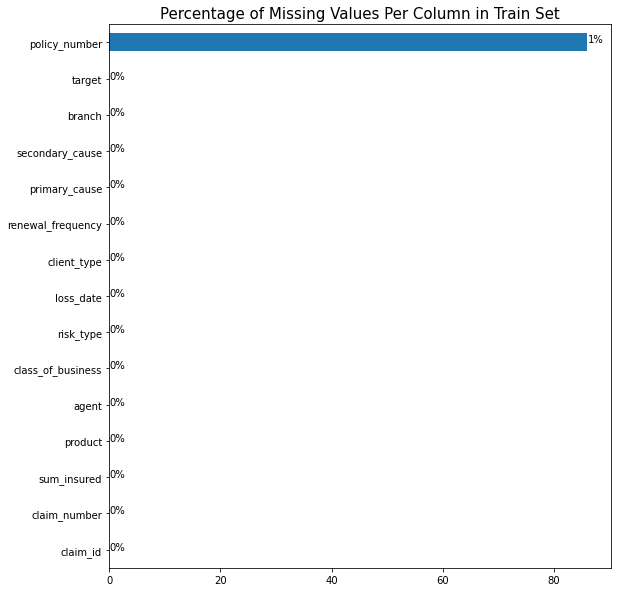

In [20]:
# Plot missing values in train set
ax = train.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in Train Set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/train.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

In [21]:
#checking for duplications
train.duplicated().sum()

0

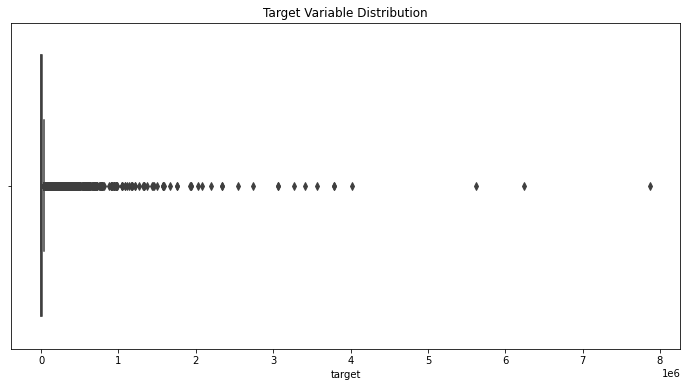

In [22]:
# A box plot showing outliers
plt.figure(figsize=(12, 6))
sns.boxplot(train.target)
plt.title('Target Variable Distribution');

In [23]:
train.columns

Index(['claim_id', 'policy_number', 'claim_number', 'sum_insured', 'product',
       'agent', 'class_of_business', 'risk_type', 'loss_date', 'client_type',
       'renewal_frequency', 'primary_cause', 'secondary_cause', 'branch',
       'target'],
      dtype='object')

In [24]:
#removing outliers
import numpy as np


# IQR
Q1 = np.percentile(train['target'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(train['target'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", train.shape)
 
# Upper bound
upper = np.where(train['target'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(train['target'] <= (Q1-1.5*IQR))
 
''' Removing the Outliers '''
train.drop(upper[0], inplace = True)
train.drop(lower[0], inplace = True)
#test.drop(upper[0], inplace = True)
#test.drop(lower[0], inplace = True)
 
print("New Shape: ", train.shape)

Old Shape:  (9376, 15)
New Shape:  (7873, 15)


In [25]:
#filling the converted outliers with mean
train = train.fillna(train.mean())

In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7873 entries, 1 to 9375
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   claim_id           7873 non-null   object 
 1   policy_number      7788 non-null   object 
 2   claim_number       7873 non-null   object 
 3   sum_insured        7873 non-null   float64
 4   product            7873 non-null   object 
 5   agent              7873 non-null   object 
 6   class_of_business  7873 non-null   object 
 7   risk_type          7873 non-null   object 
 8   loss_date          7873 non-null   object 
 9   client_type        7873 non-null   object 
 10  renewal_frequency  7873 non-null   object 
 11  primary_cause      7873 non-null   object 
 12  secondary_cause    7873 non-null   object 
 13  branch             7873 non-null   object 
 14  target             7873 non-null   float64
dtypes: float64(2), object(13)
memory usage: 778.4+ KB


In [27]:
# Convert datetime variables to datetime objects
train.loss_date = pd.to_datetime(train.loss_date, errors='coerce')

# Confirm that the dates have been converted successfully 
train.loss_date.describe()

count                    7873
unique                   1272
top       2019-08-20 00:00:00
freq                       80
first     2018-01-01 00:00:00
last      2021-10-22 00:00:00
Name: loss_date, dtype: object

In [28]:
# Convert categorical variables to categorical objects
cat_cols = train.columns.difference(['claim_id', 'loss_date', 'sum_insured', 'target']).tolist()

# Preview categorical variables
train[cat_cols].head()

,agent,branch,claim_number,class_of_business,client_type,policy_number,primary_cause,product,renewal_frequency,risk_type,secondary_cause
1,ag00226,br00002,claim0005272,cob00010,ct0003,pol000006869,pc0007,prod00005,rf0001,rt00032,sc00023
2,ag00037,br00002,claim0004147,cob00010,ct0003,pol000006135,pc0007,prod00029,rf0001,rt00026,sc00024
3,ag00037,br00001,claim0009962,cob00009,ct0003,pol000008991,pc0007,prod00005,rf0001,rt00032,sc00021
4,ag00226,br00001,claim0007346,cob00034,ct0001,pol000007768,pc0007,prod00015,rf0001,rt00023,sc00021
5,ag00037,br00002,claim0002227,cob00034,ct0001,pol000005951,pc0002,prod00015,rf0002,rt00023,sc00003


In [29]:
# Fill in missing values in categorical variables with the most common
train[cat_cols] = train[cat_cols].apply(lambda x: x.fillna(x.value_counts().index[0]))

# Convert
for col in cat_cols:
  train[col] = train[col].astype('category')

# Confirm
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7873 entries, 1 to 9375
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   claim_id           7873 non-null   object        
 1   policy_number      7873 non-null   category      
 2   claim_number       7873 non-null   category      
 3   sum_insured        7873 non-null   float64       
 4   product            7873 non-null   category      
 5   agent              7873 non-null   category      
 6   class_of_business  7873 non-null   category      
 7   risk_type          7873 non-null   category      
 8   loss_date          7873 non-null   datetime64[ns]
 9   client_type        7873 non-null   category      
 10  renewal_frequency  7873 non-null   category      
 11  primary_cause      7873 non-null   category      
 12  secondary_cause    7873 non-null   category      
 13  branch             7873 non-null   category      
 14  target  

In [30]:
# Extract day, month and year from the loss date column
# day
train['loss_date_day'] = train.loss_date.dt.day

# month
train['loss_date_month'] = train.loss_date.dt.month
 
# year
train['loss_date_year'] = train.loss_date.dt.year

# Preview engineered date features
train[['loss_date', 'loss_date_day', 'loss_date_month', 'loss_date_year']].head()# Extract day, month and year from the loss date column
# day
train['loss_date_day'] = train.loss_date.dt.day

# month
train['loss_date_month'] = train.loss_date.dt.month
 
# year
train['loss_date_year'] = train.loss_date.dt.year

# Preview engineered date features
train[['loss_date', 'loss_date_day', 'loss_date_month', 'loss_date_year']].head()

,loss_date,loss_date_day,loss_date_month,loss_date_year
1,2018-05-13,13,5,2018
2,2018-08-18,18,8,2018
3,2018-12-20,20,12,2018
4,2018-11-07,7,11,2018
5,2019-12-03,3,12,2019


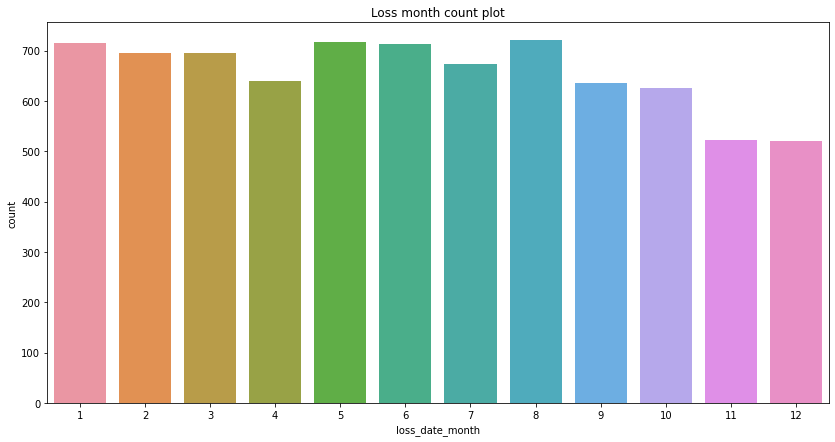

In [31]:
# Loss month countplot
plt.figure(figsize = (14, 7))
sns.countplot(x = 'loss_date_month', data = train)
plt.title('Loss month count plot')
plt.show()

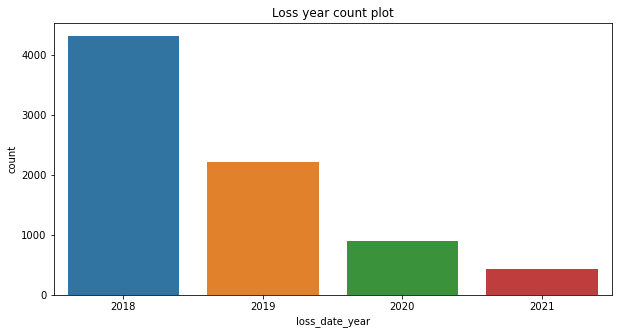

In [46]:
# Loss year countplot
plt.figure(figsize = (10, 5))
sns.countplot(x = 'loss_date_year', data = train)
plt.title('Loss year count plot')
plt.show()

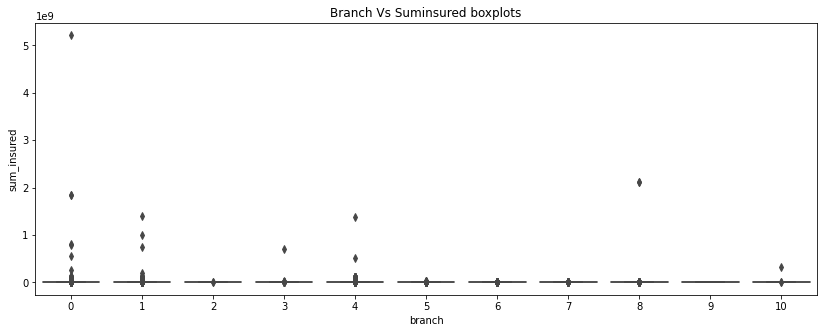

In [47]:
plt.figure(figsize = (14, 5))
sns.boxplot(x = 'branch', y = 'sum_insured', data = train)
plt.title('Branch Vs Suminsured boxplots')
plt.show()

In [48]:
# Label encode categorical variables
for col in cat_cols:
  # Instantiate Labelencoder
  le = LabelEncoder()
  train[col] = le.fit_transform(train[col])

# Preview engineered train dataset
train.head()


,claim_id,policy_number,claim_number,sum_insured,product,agent,class_of_business,risk_type,loss_date,client_type,renewal_frequency,primary_cause,secondary_cause,branch,target,loss_date_day,loss_date_month,loss_date_year
1,ID_KQ5TJMVLJ4EP,1032,2871,16000.0,4,7,9,30,2018-05-13,2,0,6,21,1,3780.24,13,5,2018
2,ID_NYHI7WJGGIAE,549,2249,3000.0,26,1,9,24,2018-08-18,2,0,6,22,1,2196.50,18,8,2018
3,ID_ROMMDCXYUXN5,2294,5303,6000.0,4,1,8,30,2018-12-20,2,0,6,19,0,105.67,20,12,2018
4,ID_2OTD9NX8L73D,1546,3937,26850.0,13,7,30,21,2018-11-07,0,0,6,19,0,1605.64,7,11,2018
5,ID_H22FLDGRJ0JR,402,1165,80000.0,13,1,30,21,2019-12-03,0,1,1,1,1,0.00,3,12,2019


Preproccessing test data

In [49]:
# Convert datetime variables to datetime objects
test.loss_date = pd.to_datetime(test.loss_date, errors='coerce')

# Fill in missing values in categorical variables with the most common
test[cat_cols] = test[cat_cols].apply(lambda x: x.fillna(x.value_counts().index[0]))

# Convert
for col in cat_cols:
  test[col] = test[col].astype('category')

# Extract day, month and year from the loss date column
test['loss_date_day'] = test.loss_date.dt.day #day

test['loss_date_month'] = test.loss_date.dt.month #month
 
test['loss_date_year'] = test.loss_date.dt.year #year

# Label encode categorical variables
for col in cat_cols:
  # Instantiate Labelencoder
  le = LabelEncoder()
  test[col] = le.fit_transform(test[col])

# Preview engineered test dataset
test.head()

,claim_id,policy_number,claim_number,sum_insured,product,agent,class_of_business,risk_type,loss_date,client_type,renewal_frequency,primary_cause,secondary_cause,branch,loss_date_day,loss_date_month,loss_date_year
0,ID_4RO0KZI9BBW2,739,1667,300000.0,4,4,8,29,2021-03-11,2,0,6,26,3,11,3,2021
1,ID_GTE9ZUJ9GZ97,312,883,2700000.0,12,3,28,20,2020-06-25,0,2,6,20,1,25,6,2020
2,ID_RUVIYRKWZ4RG,917,1895,4071352.0,10,0,14,14,2019-03-14,0,0,9,43,0,14,3,2019
3,ID_J81X8SWU6JYN,2081,3852,0.0,1,1,1,1,2018-12-04,0,1,1,10,4,4,12,2018
4,ID_94NM3JJAWWOQ,257,507,1607178.0,12,1,28,20,2019-09-18,0,2,6,20,1,18,9,2019


Modelling 

In [92]:
from sklearn.ensemble import RandomForestRegressor
# Select main columns to be used in training
main_cols = train.columns.difference(['claim_id', 'loss_date', 'target']).tolist()
X = train[main_cols]
y = train.target

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.27, random_state=7)

# Train model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Check the MAE score of the model
print(f'LinearRegression MAE score on the X_test is: {mean_absolute_error(y_test, y_pred)}')

LinearRegression MAE score on the X_test is: 3369.289985183443


In [85]:
#from sklearn.ensemble import GradientBoostRegresor

In [56]:
#Tuning the model
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap': [True],
    'max_depth': [3, 5, 8, 10, 14, 18],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
gscv = GridSearchCV(estimator = model, param_grid = param_grid,cv = 3, n_jobs = -1, verbose = 2)

In [38]:
#gscv.fit(X_train, y_train)
#print("Best parameters:", gscv.best_params_)

In [80]:
new_model = RandomForestRegressor(bootstrap= True, max_depth= 8, max_features= 6, min_samples_leaf= 7, min_samples_split= 25, n_estimators= 1500)
new_model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Check the MAE score of the model
print(f'LinearRegression MAE score on the X_test is: {mean_absolute_error(y_test, y_pred)}')

LinearRegression MAE score on the X_test is: 3309.605912397312


In [58]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train,y_train)

Lasso()

In [59]:
pred = lasso.predict(X_test)

In [60]:
mean_absolute_error(y_test, pred)

3729.701256125785

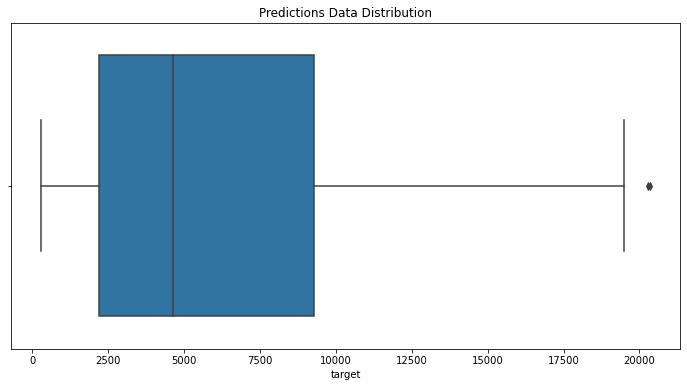

In [61]:
# Make prediction on the test set
test_df = test[main_cols]
predictions = model.predict(test_df)

# # Create a submission file
sub_file = samplesubmission.copy()
sub_file.target = predictions

# Check the distribution of your predictions
plt.figure(figsize=(12, 6))
sns.boxplot(sub_file.target)
plt.title('Predictions Data Distribution');

In [62]:
# Preview the sub_file
sub_file.head()

,claim_id,target
0,ID_4RO0KZI9BBW2,13569.8465
1,ID_GTE9ZUJ9GZ97,12344.6435
2,ID_RUVIYRKWZ4RG,4656.5884
3,ID_J81X8SWU6JYN,3711.3238
4,ID_94NM3JJAWWOQ,6311.4880


In [64]:
# Write to csv file to submit to Zindi
sub_file.to_csv("sub1.csv", index = False)